In [7]:
import pandas as pd
from fileinput import *
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
url = "https://drive.google.com/file/d/1qzzYxzrA_GjQQ_wyMM4C0pMN294oGe9M/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = df = pd.read_csv(path, encoding='ISO-8859-1')
#df = pd.read_csv(inputfile, engine = 'python')
data

,Unnamed: 0,hotel_url,name,views,views_binary,score_adjusted,bubble_rating,category_hotel,category_inn,category_specialty,...,amenities_Wardrobe / closet,amenities_Washing machine,amenities_Water park,amenities_Water park offsite,amenities_Waterslide,amenities_Waxing services,amenities_Whirlpool bathtub,amenities_Wifi,amenities_Wine / champagne,amenities_Yoga classes
0,1,https://www.tripadvisor.com/Hotel_Review-g1877...,Casa Mia in Trastevere,0,0,4.409091,4.5,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,2,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Artemide,88,1,4.798118,5.0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2,3,https://www.tripadvisor.com/Hotel_Review-g1877...,A.Roma Lifestyle Hotel,32,1,4.634085,4.5,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,https://www.tripadvisor.com/Hotel_Review-g1877...,iQ Hotel Roma,17,1,4.699138,4.5,1,0,0,...,1,1,0,0,0,0,0,1,1,0
4,5,https://www.tripadvisor.com/Hotel_Review-g1877...,The Guardian,0,0,4.624299,4.5,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,4595,https://www.tripadvisor.com/Hotel_Review-g1877...,Residence Libetta,0,0,1.733333,1.5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4595,4596,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Divine Rome,0,0,1.888889,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4596,4597,https://www.tripadvisor.com/Hotel_Review-g1877...,Best Location in Rome,0,0,2.090909,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4597,4598,https://www.tripadvisor.com/Hotel_Review-g1877...,Albatros Vittoria Vaticano,0,0,2.000000,2.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [224]:
data.describe().style.background_gradient(cmap='YlOrRd')

In [9]:
data = data[['views', 'views_binary', 'score_adjusted', 'bubble_rating', 'category_hotel', 'category_inn', 'category_specialty', 'class_4_5', 'class_3_4_5', 
            'n_reviews', 'discount', 'discount_perc', 'price_curr_min', 'price_min','price_max','amenities_24-hour check-in', 'amenities_ATM on site', 
            'amenities_Bar / lounge','amenities_BBQ facilities', 'amenities_Bottled water', 'amenities_Breakfast available', 
            'amenities_Children Activities (Kid / Family Friendly)',
            'amenities_Complimentary toiletries', 'amenities_Concierge', 'amenities_Dry cleaning', 'amenities_Flatscreen TV', 'amenities_Free breakfast', 
            'amenities_Free High Speed Internet (WiFi)', 'amenities_Housekeeping', 'amenities_Laundry service',
            'amenities_Minibar', 'amenities_Non-smoking hotel', 'amenities_Parking', 'amenities_Pets Allowed ( Dog / Pet Friendly )', 
            'amenities_Private check-in / check-out', 'amenities_Public wifi', 'amenities_Refrigerator', 'amenities_Room service', 'amenities_Safe', 
            'amenities_Shared lounge / TV area', 'amenities_Shuttle bus service', 'amenities_Suites']]

In [11]:
data.isna().count()

views                                                    4599
views_binary                                             4599
score_adjusted                                           4599
bubble_rating                                            4599
category_hotel                                           4599
category_inn                                             4599
category_specialty                                       4599
class_4_5                                                4599
class_3_4_5                                              4599
n_reviews                                                4599
discount                                                 4599
discount_perc                                            4599
price_curr_min                                           4599
price_min                                                4599
price_max                                                4599
amenities_24-hour check-in                               4599
amenitie

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 42 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   views                                                  4599 non-null   int64  
 1   views_binary                                           4599 non-null   int64  
 2   score_adjusted                                         4599 non-null   float64
 3   bubble_rating                                          4599 non-null   float64
 4   category_hotel                                         4599 non-null   int64  
 5   category_inn                                           4599 non-null   int64  
 6   category_specialty                                     4599 non-null   int64  
 7   class_4_5                                              4599 non-null   int64  
 8   class_3_4_5                                     

In [13]:
data_num = data.select_dtypes(include="number").copy()    #.drop(columns = ['hotel_url', 'name'])

In [14]:
X = data_num       #drop if need a few columns are't usefull
y = X.pop("bubble_rating")

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [15]:
#X_num = X.select_dtypes(include="number").copy()

In [297]:
data_num

,views,views_binary,score_adjusted,category_hotel,category_inn,category_specialty,class_4_5,class_3_4_5,n_reviews,discount,...,amenities_Parking,amenities_Pets Allowed ( Dog / Pet Friendly ),amenities_Private check-in / check-out,amenities_Public wifi,amenities_Refrigerator,amenities_Room service,amenities_Safe,amenities_Shared lounge / TV area,amenities_Shuttle bus service,amenities_Suites
0,0,0,4.409091,0,1,0,0,1,154,0,...,0,0,0,0,0,0,1,0,0,1
1,88,1,4.798118,1,0,0,1,1,8286,1,...,0,0,0,1,0,1,1,1,0,1
2,32,1,4.634085,1,0,0,1,1,4389,1,...,1,0,0,1,1,1,1,0,1,1
3,17,1,4.699138,1,0,0,1,1,4987,0,...,1,0,0,1,1,0,1,1,0,0
4,0,0,4.624299,1,0,0,0,1,1068,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,0,0,1.733333,1,0,0,1,1,15,0,...,0,0,0,0,1,0,0,0,0,0
4595,0,0,1.888889,0,0,1,0,0,9,0,...,0,0,0,0,0,1,0,0,0,0
4596,0,0,2.090909,0,0,1,0,0,11,0,...,0,0,0,0,0,0,1,0,1,0
4597,0,0,2.000000,1,0,0,0,0,98,0,...,0,0,0,1,1,0,0,0,0,0


In [20]:
#from numpy import array
from sklearn.feature_selection import VarianceThreshold
## Resetting the value of X to make it non-categorical
## X = array[:, 0:8]

#V_threshold = VarianceThreshold(threshold=0)
#V_threshold.fit(X) # fit finds the features with zero variance
#V_threshold.get_support()

In [16]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler.
my_scaler = MinMaxScaler().set_output(transform="pandas")

# Fit the scaler to X_train and transform the values.
X_train_scaled = my_scaler.fit_transform(X)

In [17]:
#VARIANCE THRESHOLD 
thresh_table = (
  pd.DataFrame({
  'Range': X_train_scaled.max() - X_train_scaled.min(),
  'Variance': X_train_scaled.var()})
  .sort_values(by='Variance', ascending=False)
)

In [18]:
thresh_table

,Range,Variance
amenities_Flatscreen TV,1.0,0.246894
amenities_Free breakfast,1.0,0.241249
amenities_Public wifi,1.0,0.238208
amenities_Safe,1.0,0.236846
category_inn,1.0,0.235775
amenities_Non-smoking hotel,1.0,0.225845
amenities_Housekeeping,1.0,0.224888
amenities_Refrigerator,1.0,0.211451
class_3_4_5,1.0,0.208402
amenities_Complimentary toiletries,1.0,0.203846


In [21]:
selector = VarianceThreshold(threshold=0.006)

X_train_var = pd.DataFrame(selector.fit_transform(X_train_scaled), columns = selector.get_feature_names_out()) # SAVING NAMES OF COLUMNS
#columns=poly.get_feature_names(X_test.columns)
#X_train_var.columns = X_train_scaled.columns
features_list = X_train_var.columns.to_list
features_list

<bound method IndexOpsMixin.tolist of Index(['views_binary', 'score_adjusted', 'category_hotel', 'category_inn',
       'category_specialty', 'class_4_5', 'class_3_4_5', 'discount',
       'amenities_24-hour check-in', 'amenities_ATM on site',
       'amenities_Bar / lounge', 'amenities_BBQ facilities',
       'amenities_Bottled water', 'amenities_Breakfast available',
       'amenities_Children Activities (Kid / Family Friendly)',
       'amenities_Complimentary toiletries', 'amenities_Concierge',
       'amenities_Dry cleaning', 'amenities_Flatscreen TV',
       'amenities_Free breakfast', 'amenities_Free High Speed Internet (WiFi)',
       'amenities_Housekeeping', 'amenities_Laundry service',
       'amenities_Minibar', 'amenities_Non-smoking hotel', 'amenities_Parking',
       'amenities_Pets Allowed ( Dog / Pet Friendly )',
       'amenities_Private check-in / check-out', 'amenities_Public wifi',
       'amenities_Refrigerator', 'amenities_Room service', 'amenities_Safe',
       

In [22]:
features_list

<bound method IndexOpsMixin.tolist of Index(['views_binary', 'score_adjusted', 'category_hotel', 'category_inn',
       'category_specialty', 'class_4_5', 'class_3_4_5', 'discount',
       'amenities_24-hour check-in', 'amenities_ATM on site',
       'amenities_Bar / lounge', 'amenities_BBQ facilities',
       'amenities_Bottled water', 'amenities_Breakfast available',
       'amenities_Children Activities (Kid / Family Friendly)',
       'amenities_Complimentary toiletries', 'amenities_Concierge',
       'amenities_Dry cleaning', 'amenities_Flatscreen TV',
       'amenities_Free breakfast', 'amenities_Free High Speed Internet (WiFi)',
       'amenities_Housekeeping', 'amenities_Laundry service',
       'amenities_Minibar', 'amenities_Non-smoking hotel', 'amenities_Parking',
       'amenities_Pets Allowed ( Dog / Pet Friendly )',
       'amenities_Private check-in / check-out', 'amenities_Public wifi',
       'amenities_Refrigerator', 'amenities_Room service', 'amenities_Safe',
       

In [23]:
print("shape before:", X_train_scaled.shape)
print("shape after:", X_train_var.shape)

shape before: (4599, 41)
shape after: (4599, 35)


In [158]:
#thresh_table[thresh_table.index.isin(['views', 'n_reviews'])]    # & (df.Period > 2)]

,Range,Variance
n_reviews,1.0,0.002595
views,1.0,0.000643


In [83]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

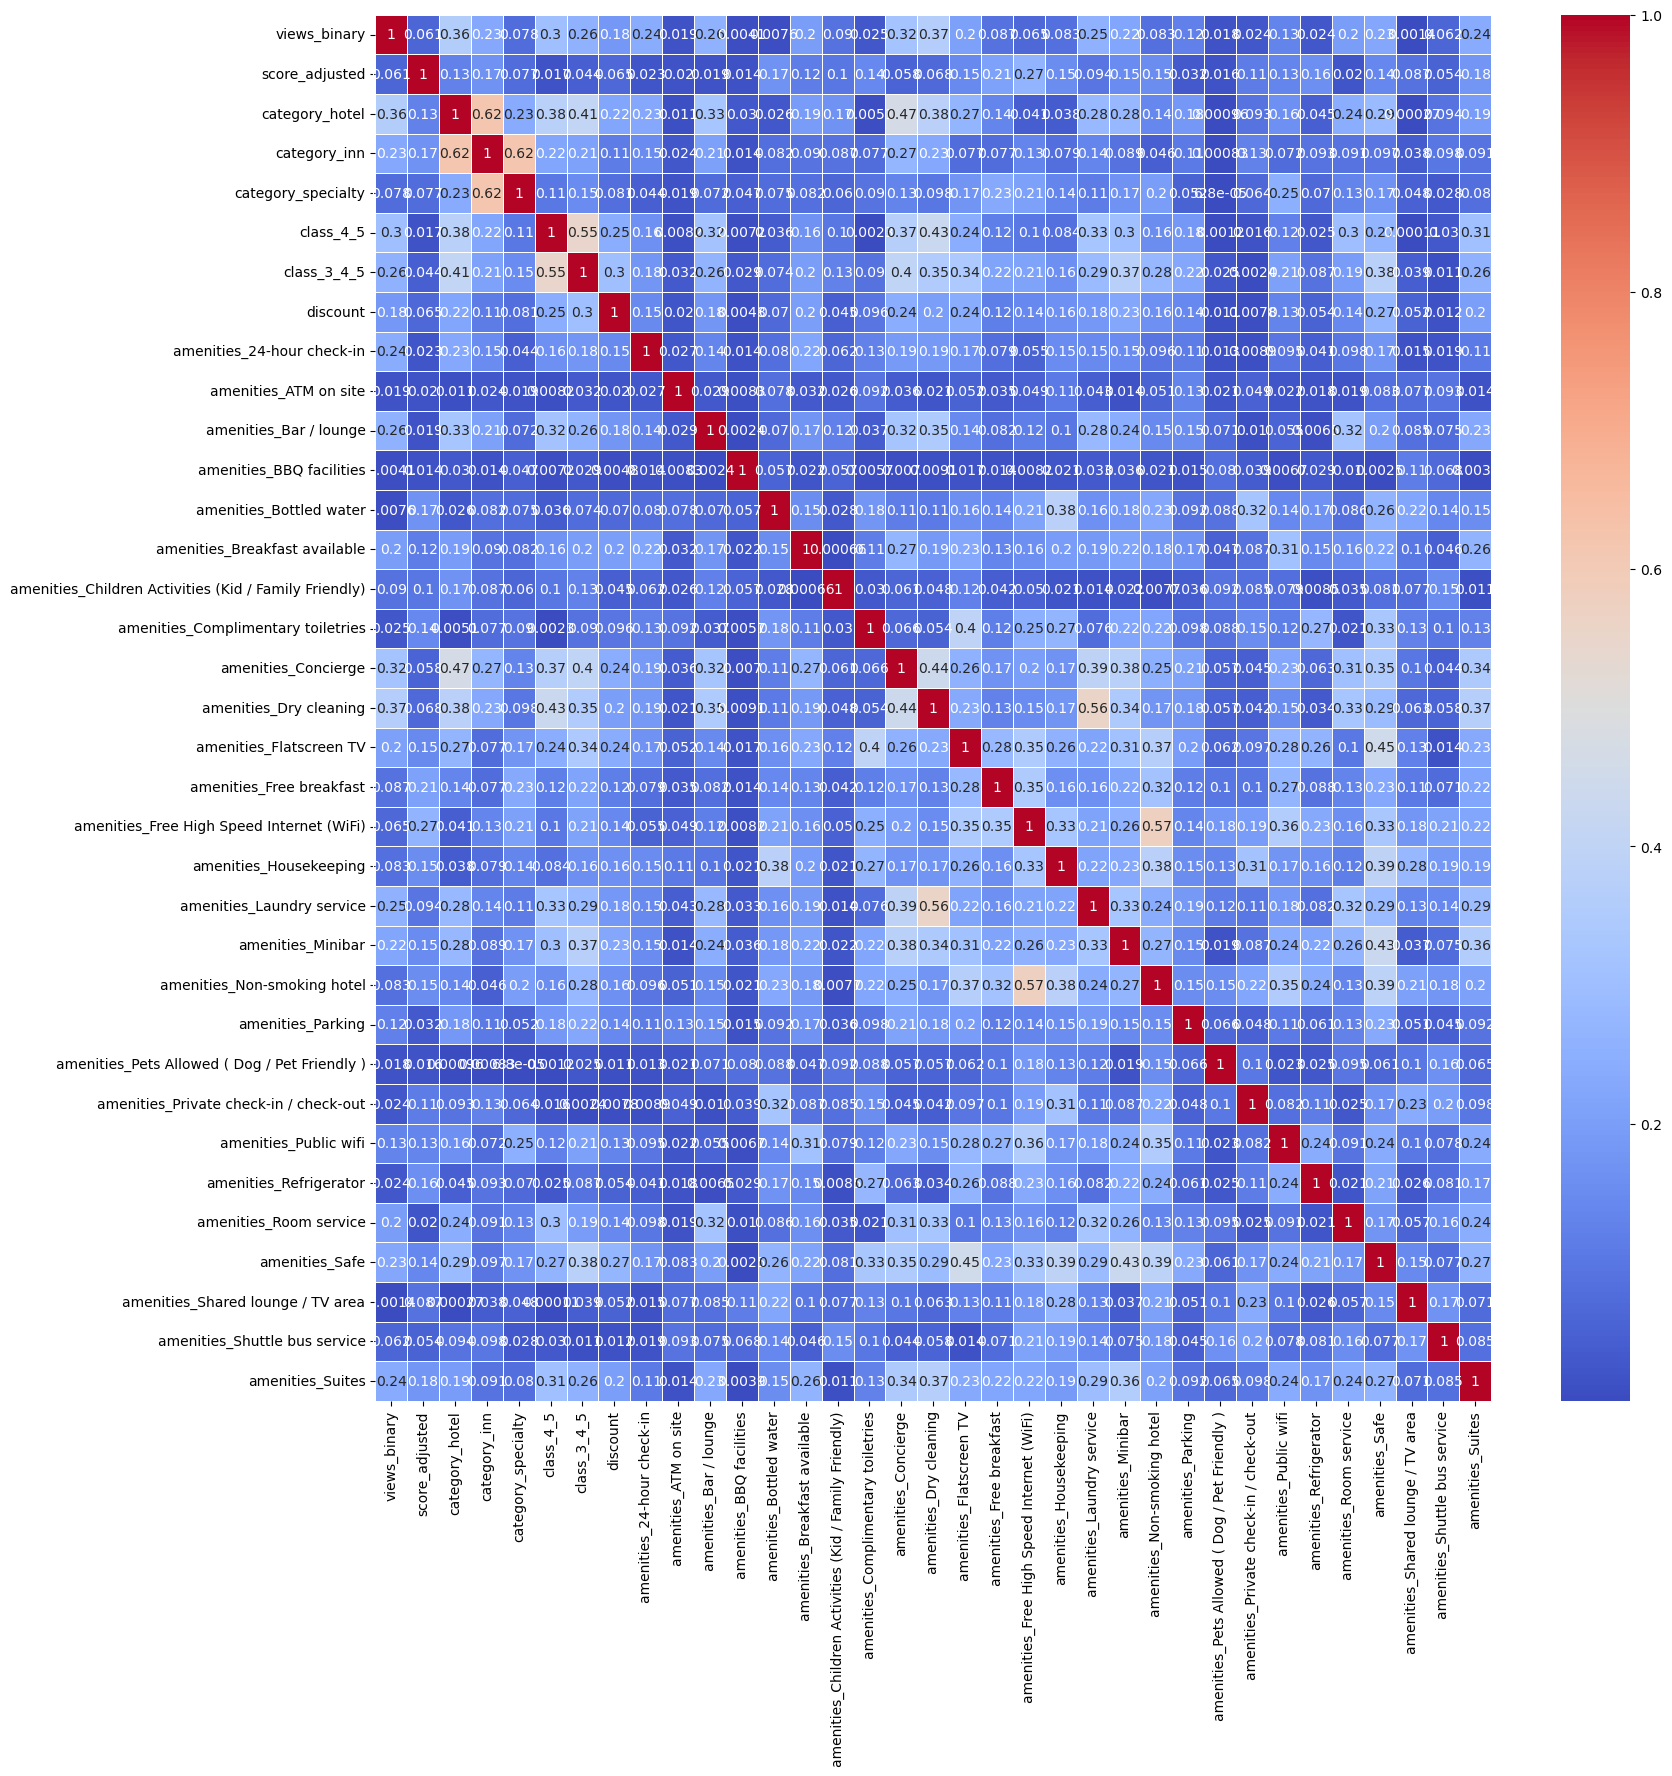

In [24]:
# Calculate the absolute correlation matrix for the feature matrix X_train_var2
corrMatrix = X_train_var.corr().abs()

# Set the size of the heatmap to be 18x18 inches
plt.figure(figsize=(18, 18))

sns.heatmap(corrMatrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5);

In [25]:
X[['views_binary', 'score_adjusted', 'category_hotel', 'category_inn',
       'class_4_5', 'class_3_4_5', 'discount',
       'amenities_24-hour check-in', 'amenities_ATM on site',
       'amenities_Bar / lounge', 'amenities_BBQ facilities',
       'amenities_Bottled water', 'amenities_Breakfast available',
       'amenities_Children Activities (Kid / Family Friendly)',
       'amenities_Complimentary toiletries', 'amenities_Concierge',
       'amenities_Dry cleaning', 'amenities_Flatscreen TV',
       'amenities_Free breakfast', 'amenities_Free High Speed Internet (WiFi)',
       'amenities_Housekeeping', 'amenities_Laundry service',
       'amenities_Minibar', 'amenities_Non-smoking hotel', 'amenities_Parking',
       'amenities_Pets Allowed ( Dog / Pet Friendly )',
       'amenities_Private check-in / check-out', 'amenities_Public wifi',
       'amenities_Refrigerator', 'amenities_Room service', 'amenities_Safe',
       'amenities_Shared lounge / TV area', 'amenities_Shuttle bus service',
       'amenities_Suites']]
#X = X.drop(columns = ['category_specialty'])

,views_binary,score_adjusted,category_hotel,category_inn,class_4_5,class_3_4_5,discount,amenities_24-hour check-in,amenities_ATM on site,amenities_Bar / lounge,...,amenities_Parking,amenities_Pets Allowed ( Dog / Pet Friendly ),amenities_Private check-in / check-out,amenities_Public wifi,amenities_Refrigerator,amenities_Room service,amenities_Safe,amenities_Shared lounge / TV area,amenities_Shuttle bus service,amenities_Suites
0,0,4.409091,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,1,4.798118,1,0,1,1,1,0,1,1,...,0,0,0,1,0,1,1,1,0,1
2,1,4.634085,1,0,1,1,1,0,0,1,...,1,0,0,1,1,1,1,0,1,1
3,1,4.699138,1,0,1,1,0,0,1,1,...,1,0,0,1,1,0,1,1,0,0
4,0,4.624299,1,0,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,0,1.733333,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4595,0,1.888889,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4596,0,2.090909,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4597,0,2.000000,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

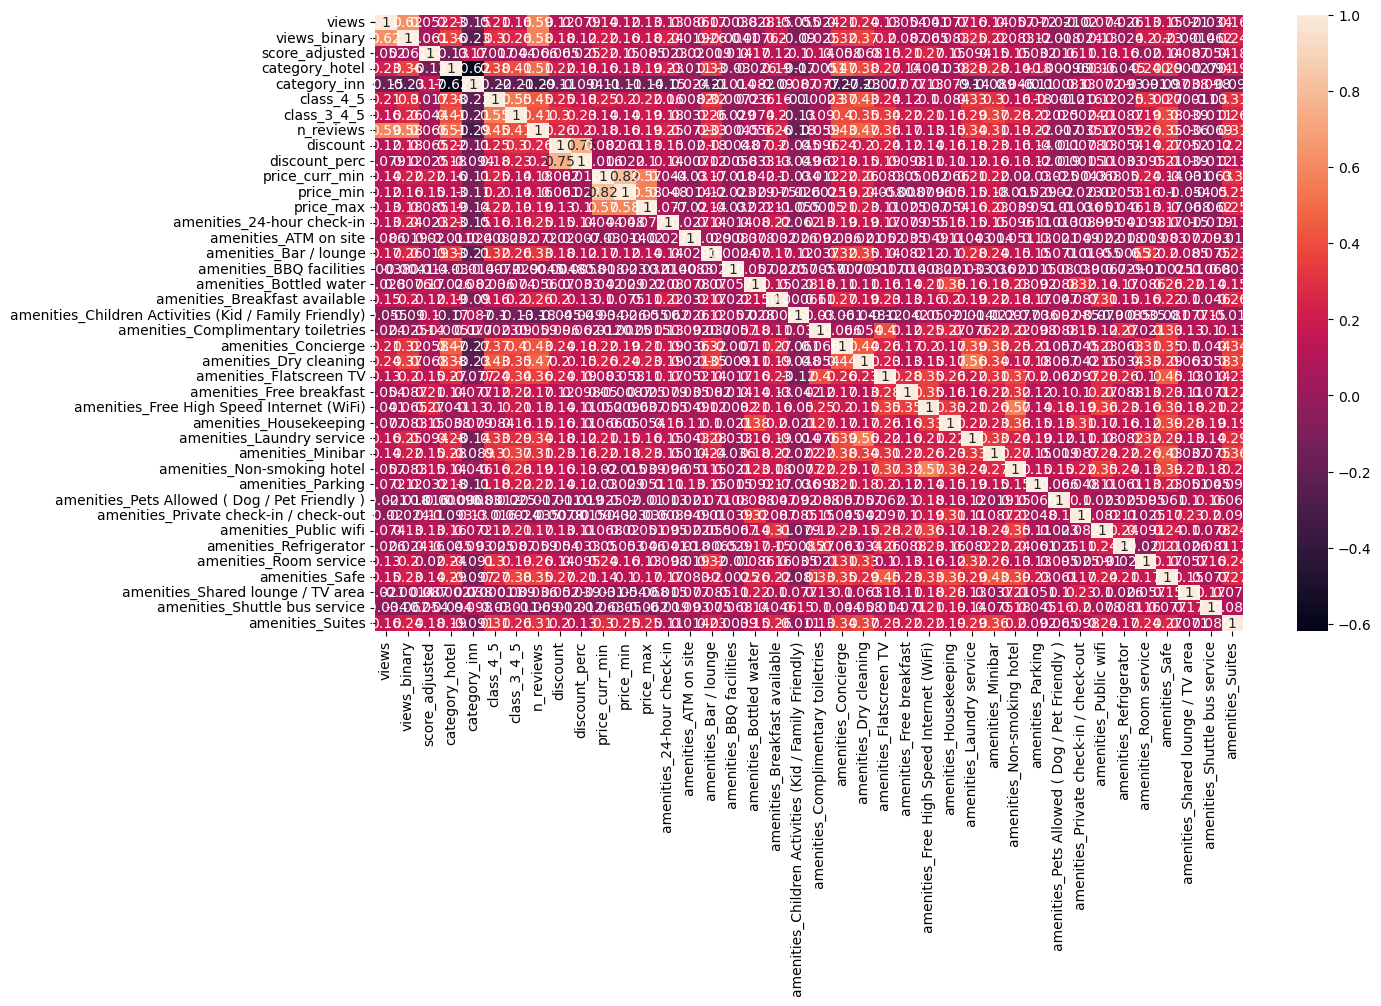

In [271]:
plt.figure(figsize=(14,8))
sns.heatmap(X.corr(),annot=True);

In [27]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFECV, SelectFromModel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [276]:
#imputer = SimpleImputer()
#X_imput = imputer.fit_transform(X_train)

# MODELLING

## CLASSIFICATION

In [28]:
#X_cat = X.select_dtypes(exclude="number").copy()
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
#imputer = KNNImputer(n_neighbors=2)

X_num = X.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
       KNNImputer(n_neighbors=2))  #SimpleImputer(strategy="mean"))


preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),      #X_num
    ]
)

In [88]:
from sklearn import preprocessing
from sklearn import utils

In [29]:
y = y.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# DecisionTreeClassifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
big_pipeline = make_pipeline(preprocessor,
                              DecisionTreeClassifier())

param_grid = {
    "columntransformer__num_pipe__knnimputer__n_neighbors": range(1,5,2),
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}
  
search_dt = GridSearchCV(big_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_dt.fit(X_train, y_train)  

scores = {"dtree" : search_dt.best_score_}
scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'dtree': 1.0}

In [44]:
search_dt.best_params_

{'columntransformer__num_pipe__knnimputer__n_neighbors': 1,
 'decisiontreeclassifier__max_depth': 8,
 'decisiontreeclassifier__min_samples_leaf': 3}

In [306]:
from sklearn.metrics import accuracy_score
accuracy_score(search_dt.predict(X_test), y_test)

1.0

# ConfusionMatrixDisplay

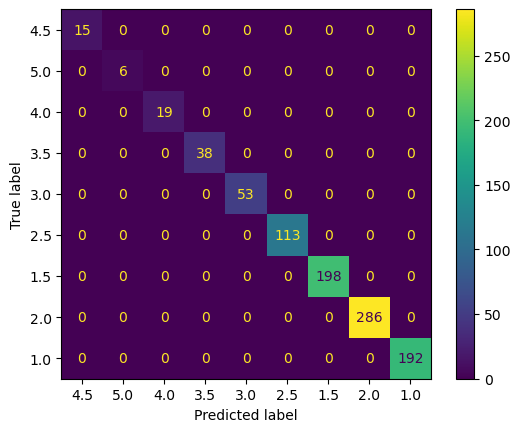

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search_dt,
                                      X_test,
                                      y_test,
                                      display_labels=['4.5', '5.0', '4.0', '3.5', '3.0', '2.5', '1.5', '2.0', '1.0']);

In [ ]:
import numpy as np
from sklearn.metrics import f1_score
y_true = y_train
y_pred = search_dt.predict(X_train)
f1_score(y_true, y_pred)# ,average=None)

# RandomForestClassifier

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


big_pipeline = make_pipeline(preprocessor,
                              RandomForestClassifier())

param_grid = {
    "columntransformer__num_pipe__knnimputer__n_neighbors": [3],
    #"columntransformer__num_pipe__minmaxscaler__clip":[True, False],
   # "randomforestclassifier__random_state":[0],
    "randomforestclassifier__max_depth":[6,8,1],
    "randomforestclassifier__criterion":['entropy'], # 'gini'], #, 'log_loss'],
    "randomforestclassifier__max_features":["sqrt"],# "log2"],
   # "randomforestclassifier__max_samples":[0.0, 1.0],
    "randomforestclassifier__class_weight":["balanced_subsample"],  #"balanced_subsample", 
    "randomforestclassifier__bootstrap":[True], #, False],
    #"randomforestclassifier__min_impurity_decrease":[0],
    "randomforestclassifier__n_estimators":[1000],
     "randomforestclassifier__oob_score":[True] #, False]
    
}

search_rfc = GridSearchCV(big_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_rfc.fit(X_train, y_train)

scores = {"RandomForestClassifier" : search_rfc.best_score_}
scores

Fitting 5 folds for each of 3 candidates, totalling 15 fits


{'RandomForestClassifier': 0.9567812777284826}

In [60]:
search_rfc.best_params_

{'columntransformer__num_pipe__knnimputer__n_neighbors': 3,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__class_weight': 'balanced_subsample',
 'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': 8,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__n_estimators': 1000,
 'randomforestclassifier__oob_score': True}

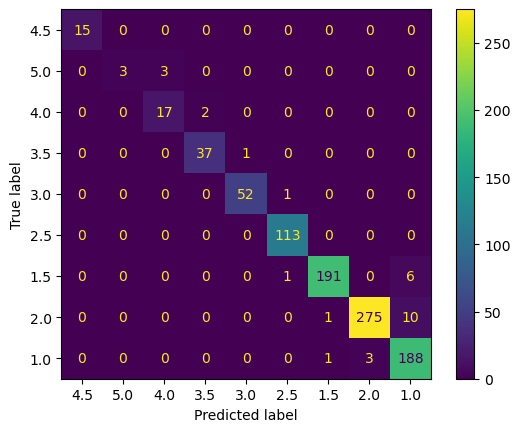

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search_rfc,
                                      X_test,
                                      y_test,
                                      display_labels=['4.5', '5.0', '4.0', '3.5', '3.0', '2.5', '1.5', '2.0', '1.0']);

In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import OrdinalEncoder

#Preprocessing
#X_cat = X.select_dtypes(exclude="number").copy()  #.columns.copy()
X_num = X.select_dtypes(include="number").copy()   #.columns.copy()

numeric_pipe = make_pipeline(
    KNNImputer(n_neighbors=2),
    MinMaxScaler())


full_preprocessing = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns)
        #("cat_pipe", categorical_pipe, X_cat.columns)
    ]
)

# Decision Tree Regressor

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt_pipeline = make_pipeline(full_preprocessing,
                            DecisionTreeRegressor())

param_grid = {
    "columntransformer__num_pipe__knnimputer__n_neighbors": range(1,5,1),
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2)
}

search_dtr = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search_dtr.fit(X_train, y_train)

scores = {"DecisionTreeRegressor" : search_dtr.best_score_}
scores

Fitting 5 folds for each of 120 candidates, totalling 600 fits


{'DecisionTreeRegressor': 1.0}

In [68]:
dtr_predictions = search_dtr.predict(X_test)

In [69]:
from sklearn.metrics import r2_score
dtr_r2 = r2_score(y_true = y_test,
                  y_pred = dtr_predictions)
#lr_r2 = r2_score(y_true = y_test,
 #                y_pred = lr_predictions)

comparing_models_df = pd.DataFrame({"DT": [dtr_r2]}, #, dt_r2, sgd_r2, lr_r2]},
                                    index=["dt_r2"])  #, "decision_tree", "sgd", "linear_regression"])

comparing_models_df

,DT
dt_r2,1.0


In [328]:
#imputer = SimpleImputer()
#X_imput = imputer.fit_transform(X_train)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
top_100_views = data_relevant.nlargest(100, 'views')  # Replace 'views' with the criteria you want to use
top_50_rating = top_100_views.loc[top_100_views['bubble_rating'] >= 4.5]
top_10_n_reviews = top_50_rating.nlargest(50, 'n_reviews').head(10)
top_10_n_reviews.sort_values(by='n_reviews', ascending=False, na_position='first')


# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_n_reviews['name'], top_10_n_reviews['n_reviews'], color='darkgreen')  #tan
plt.xlabel('Number of Reviews', fontsize=12, fontweight='bold', color='black') #saddlebrown
plt.title('Top 10 Hotels by Number of Reviews', fontsize=14, fontweight='bold', color='black')  #saddlebrown
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.savefig('Top 10 Hotels by Number of Reviews.png')
plt.show()

In [77]:
features_10 = thresh_table.nlargest(10, 'Variance')
features_10

,Range,Variance
amenities_Flatscreen TV,1.0,0.246894
amenities_Free breakfast,1.0,0.241249
amenities_Public wifi,1.0,0.238208
amenities_Safe,1.0,0.236846
category_inn,1.0,0.235775
amenities_Non-smoking hotel,1.0,0.225845
amenities_Housekeeping,1.0,0.224888
amenities_Refrigerator,1.0,0.211451
class_3_4_5,1.0,0.208402
amenities_Complimentary toiletries,1.0,0.203846


In [78]:
features_10.index

Index(['amenities_Flatscreen TV', 'amenities_Free breakfast',
       'amenities_Public wifi', 'amenities_Safe', 'category_inn',
       'amenities_Non-smoking hotel', 'amenities_Housekeeping',
       'amenities_Refrigerator', 'class_3_4_5',
       'amenities_Complimentary toiletries'],
      dtype='object')

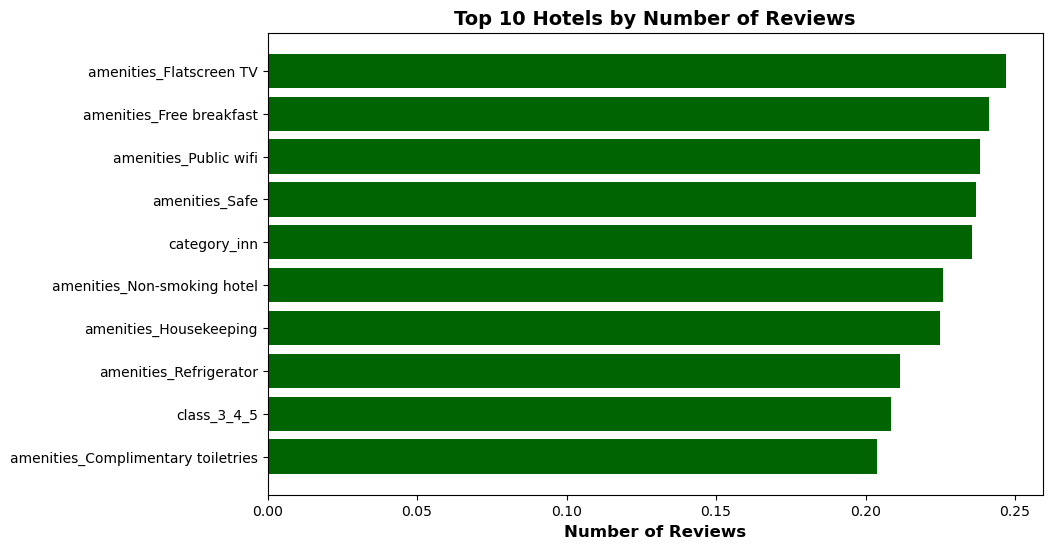